In [73]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("nba_2013.csv") # Reading the Data
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [9]:
data.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [14]:
data["fg."].fillna(data["fg."].mean(),inplace=True)
data["x2p."].fillna(data["x2p."].mean(),inplace=True)
data["efg."].fillna(data["efg."].mean(),inplace=True)
data["x3p."].fillna(data["x3p."].mean(),inplace=True)
data["ft."].fillna(data["ft."].mean(),inplace=True)

In [15]:
data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098467,50.855639,132.751732,0.146218,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.401000,0.000000,3.000000,0.262626,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.437000,16.000000,48.000000,0.314607,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479000,68.000000,193.000000,0.366460,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [17]:
data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [28]:
# numcol=data.select_dtypes(include=[np.number]).columns
# numcol

In [40]:
X= data[[ 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts']]
for column in X:
        enc=LabelEncoder()
        if X.dtypes[column]==np.object:
             X[column]=enc.fit_transform(X[column])    

<AxesSubplot:>

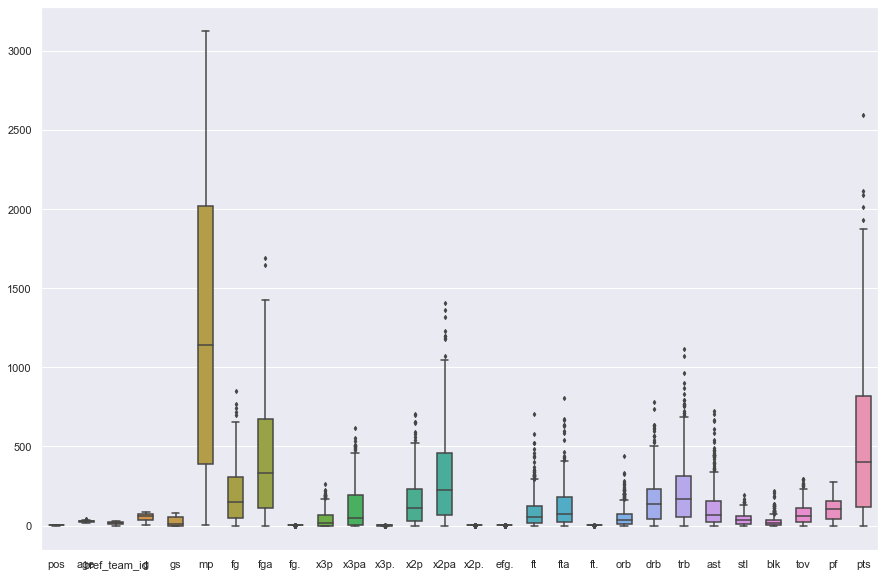

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)

In [41]:
for column in X:
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    print("Q1=",Q1," Q3=",Q3," IQR=",IQR,end=' ')
    filter = (X[column] >= Q1 - 2 * IQR) & (X[column] <= Q3 + 2.4 *IQR)
    X=X.loc[filter]
    print(" len=",len(X))

Q1= 3.0  Q3= 5.0  IQR= 2.0  len= 481
Q1= 23.0  Q3= 29.0  IQR= 6.0  len= 481
Q1= 8.0  Q3= 25.0  IQR= 17.0  len= 481
Q1= 32.0  Q3= 76.0  IQR= 44.0  len= 481
Q1= 0.0  Q3= 54.0  IQR= 54.0  len= 481
Q1= 388.0  Q3= 2016.0  IQR= 1628.0  len= 481
Q1= 47.0  Q3= 307.0  IQR= 260.0  len= 481
Q1= 110.0  Q3= 672.0  IQR= 562.0  len= 481
Q1= 0.401  Q3= 0.479  IQR= 0.07799999999999996  len= 459
Q1= 0.0  Q3= 69.0  IQR= 69.0  len= 458
Q1= 5.0  Q3= 197.75  IQR= 192.75  len= 458
Q1= 0.26716417910447776  Q3= 0.3687719298245615  IQR= 0.10160775072008371  len= 393
Q1= 36.0  Q3= 230.0  IQR= 194.0  len= 391
Q1= 81.0  Q3= 456.0  IQR= 375.0  len= 390
Q1= 0.43471904398677835  Q3= 0.5066490830755632  IQR= 0.07193003908878487  len= 387
Q1= 0.45399999999999996  Q3= 0.5235000000000001  IQR= 0.06950000000000012  len= 385
Q1= 20.0  Q3= 138.0  IQR= 118.0  len= 379
Q1= 28.0  Q3= 169.0  IQR= 141.0  len= 378
Q1= 0.6812499999999999  Q3= 0.82275  IQR= 0.14150000000000007  len= 371
Q1= 15.0  Q3= 60.5  IQR= 45.5  len= 361
Q1= 5

In [46]:
y=X['pts']
X.drop(columns=['pts'],inplace=True)

In [77]:
scalar = StandardScaler()
scalery = StandardScaler()
X_scaled = scalar.fit_transform(X)
Y_scaled = scalery.fit_transform(y.values.reshape(-1, 1))

In [78]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.928637,pos
1,1.161049,age
2,1.073776,bref_team_id
3,7.235415,g
4,5.509535,gs
5,46.018459,mp
6,inf,fg
7,inf,fga
8,8.809994,fg.
9,inf,x3p


In [84]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_scaled, test_size= 0.5)

In [85]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print ("Regression score is:",format(r2_score(y_test, y_pred),'.4f'))
print ("rmse score is:",format(mean_squared_error(y_test, y_pred),'.4f'))

Regression score is: 0.9521
rmse score is: 0.0530


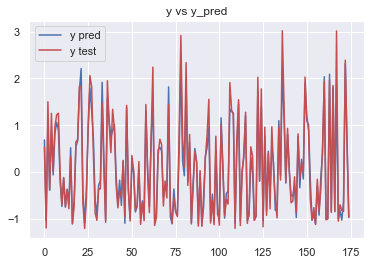

In [92]:
plt.plot(range(len(y_test)),y_pred,c='b', label='y pred')
plt.plot(range(len(y_test)),y_test,c='r', label='y test')
plt.title('y vs y_pred')
plt.legend()
plt.show()
